In [1]:
from sbivibm.tasks import Pyloric
from sbivibm.utils import get_posterior_by_id, get_full_dataset, get_samples_by_id, get_predictive_samples_by_id
from sbi.utils import pairplot, conditional_pairplot
import torch

In [2]:
import random 
import numpy as np

In [3]:
seed = 0
torch.manual_seed(seed)
random.seed(seed)
np.random.seed(seed)

In [4]:
task = Pyloric()
simulator = task.get_simulator(sim_type="slurm")

In [5]:
# Two independent runs which are equivalent
seeded_id_run1 = "2630e300-3b4b-4087-808b-6450c158c2f7"
seeded_id_run1 = "18fd570e-9289-4928-83c9-bf89a7e77f08"

## Compute an approx with 94% valid rate

We use the following post-hoc refinement:

- posterior.train(loss="renjey_divergence", alpha=0.8, warm_up_rounds=0, n_particles=1000, learning_rate=1e-4, min_num_iters=0, max_num_iters=2000)
- posterior.train(loss="renjey_divergence", alpha=0.5, warm_up_rounds=0, n_particles=5000, learning_rate=1e-4, min_num_iters=0, check_for_convergence=False, max_num_iters=2000)

No further simulations are made. Note renjey_divergence is more mode seeking than fKL but not as mode seeking as rKL.

In [6]:
#!sbatch run_script2.sh

In [7]:
# Wait until finished !

In [8]:
posterior = torch.load("posterior_reproducible_94_slurm_reruned.pkl")

In [9]:
thetas_predictives = posterior.sample((10000,))

In [10]:
# xs_predictives = simulator(thetas_predictives)

In [11]:
# torch.save(thetas_predictives, "thetas_for_predictive2.pkl")
# torch.save(xs_predictives, "xs_for_predictive2.pkl")

In [12]:
thetas_predictives = torch.load( "thetas_for_predictive2.pkl")
xs_predictives = torch.load( "xs_for_predictive2.pkl")

In [31]:
sum((xs_predictives!=-99).all(1))

tensor(9413)

In [13]:
frac_valid = sum((xs_predictives!=-99).all(1))/len(xs_predictives)
print(f"{frac_valid:.2}")

0.94


## Figures

In [14]:
samples = posterior.sample((10000000,), vi_parameters={"sampling_method_params":{"num_samples_batch": 100000}})

In [15]:
MEAN = samples.mean(0)
MEAN

tensor([ 2.8290e+02,  4.0023e+00,  4.0960e+00,  3.0739e+01,  9.3366e+00,
         1.0261e+02,  9.0802e-03,  3.7319e-03,  1.2265e+02,  1.0317e+00,
         5.6445e+00,  3.8803e+01,  5.7221e+00,  8.0035e+01,  3.2949e-02,
         2.5432e-02,  3.3915e+02,  7.5273e+00,  2.9471e+00,  4.2910e+01,
         1.6141e+00,  1.0217e+02,  3.5635e-02,  1.8582e-02, -1.0067e+01,
        -1.4269e+01, -1.3157e+01, -9.2024e+00, -9.3159e+00, -1.5803e+01,
        -1.0077e+01])

In [16]:
MAP = posterior.map(init_method=MEAN.reshape(1,-1), learning_rate=1e-3,num_iter=2000)

/mnt/qb/work/macke/mgloeckler90/miniconda3/envs/snvi/lib/python3.9/site-packages/sbi/inference/posteriors/base_posterior.py:913: UserWarning: This method for obtaining the MAP estimate was introduced recently (sbi v0.15.0) and has not been tested extensively yet. You might have to tune the hyperparameters, especially `num_iter` and `learning_rate`. If you experience problems, please create an issue on Github: https://github.com/mackelab/sbi/issues
  warn(


Optimizing MAP estimate. Iterations: 1 /
                        2000. Performance in iteration
                        0:
Optimizing MAP estimate. Iterations: 2 /alized log-prob
                        2000. Performance in iteration
                        0:
Optimizing MAP estimate. Iterations: 3 /alized log-prob
                        2000. Performance in iteration
                        0:
Optimizing MAP estimate. Iterations: 4 /alized log-prob
                        2000. Performance in iteration
                        0:
Optimizing MAP estimate. Iterations: 5 /alized log-prob
                        2000. Performance in iteration
                        0:
Optimizing MAP estimate. Iterations: 6 /alized log-prob
                        2000. Performance in iteration
                        0:
Optimizing MAP estimate. Iterations: 7 /alized log-prob
                        2000. Performance in iteration
                        0:
Optimizing MAP estimate. Iterations: 8 /alized lo

In [17]:
print(MAP)

tensor([ 2.0746e+02,  4.5938e+00,  3.8907e+00,  3.0492e+01,  9.6344e+00,
         1.2466e+02,  9.2952e-03,  3.6128e-03,  9.5300e+01,  1.3594e+00,
         5.1614e+00,  4.1929e+01,  7.2575e+00,  8.4088e+01,  3.0819e-02,
         2.5567e-02,  3.2252e+02,  5.8858e+00,  2.9314e+00,  4.3589e+01,
         1.4031e+00,  1.2957e+02,  3.3869e-02,  1.7936e-02, -9.2565e+00,
        -1.2871e+01, -1.5134e+01, -8.9312e+00, -8.9237e+00, -1.5746e+01,
        -1.0046e+01])


In [18]:
labels_ = ['AB-Na    $\\;\\;$',
 'AB-CaT    $\\;\\;$',
 'AB-CaS    $\\;\\;$',
 'AB-A    $\\;\\;$',
 'AB-KCa    $\\;\\;$',
 'AB-Kd    $\\;\\;$',
 'AB-H    $\\;\\;$',
 'AB-leak    $\\;\\;$',
 'LP-Na    $\\;\\;$',
 'LP-CaT    $\\;\\;$',
 'LP-CaS    $\\;\\;$',
 'LP-A    $\\;\\;$',
 'LP-KCa    $\\;\\;$',
 'LP-Kd    $\\;\\;$',
 'LP-H    $\\;\\;$',
 'LP-leak    $\\;\\;$',
 'PY-Na    $\\;\\;$',
 'PY-CaT    $\\;\\;$',
 'PY-CaS    $\\;\\;$',
 'PY-A    $\\;\\;$',
 'PY-KCa    $\\;\\;$',
 'PY-Kd    $\\;\\;$',
 'PY-H    $\\;\\;$',
 'PY-leak    $\\;\\;$',
 '$\\mathdefault{AB-LP}$    $\\;\\;$',
 '$\\mathdefault{PD-LP}$    $\\;\\;$',
 '$\\mathdefault{AB-PY}$    $\\;\\;$',
 '$\\mathdefault{PD-PY}$    $\\;\\;$',
 '$\\mathdefault{LP-PD}$    $\\;\\;$',
 '$\\mathdefault{LP-PY}$    $\\;\\;$',
 '$\\mathdefault{PY-LP}$    $\\;\\;$',
 '$\\mathrm{Q}_{\\mathrm{10}} \\mathrm{Na}$    $\\;\\;$',
 '$\\mathrm{Q}_{\\mathrm{10}} \\mathrm{CaT}$    $\\;\\;$',
 '$\\mathrm{Q}_{\\mathrm{10}} \\mathrm{CaS}$    $\\;\\;$',
 '$\\mathrm{Q}_{\\mathrm{10}} \\mathrm{CaA}$    $\\;\\;$',
 '$\\mathrm{Q}_{\\mathrm{10}} \\mathrm{KCa}$    $\\;\\;$',
 '$\\mathrm{Q}_{\\mathrm{10}} \\mathrm{Kd}$    $\\;\\;$',
 '$\\mathrm{Q}_{\\mathrm{10}} \\mathrm{H}$    $\\;\\;$',
 '$\\mathrm{Q}_{\\mathrm{10}} \\mathrm{leak}$    $\\;\\;$',
 '$\\mathrm{Q}_{\\mathrm{10}} \\mathrm{glut}$    $\\;\\;$',
 '$\\mathrm{Q}_{\\mathrm{10}} \\mathrm{chol}$    $\\;\\;$']

all_labels = [['$\\mathdefault{0.0}\\;\\;\\;$      ', '$\\mathdefault{500}\\;\\;\\;$   '],
 ['$\\mathdefault{0.0}\\;\\;\\;$      ', '$\\mathdefault{7}\\;\\;\\;$   '],
 ['$\\mathdefault{0.0}\\;\\;\\;$      ', '$\\mathdefault{8}\\;\\;\\;$   '],
 ['$\\mathdefault{0.0}\\;\\;\\;$      ', '$\\mathdefault{60}\\;\\;\\;$   '],
 ['$\\mathdefault{0.0}\\;\\;\\;$      ', '$\\mathdefault{15}\\;\\;\\;$   '],
 ['$\\mathdefault{25}\\;\\;\\;$      ', '$\\mathdefault{150}\\;\\;\\;$   '],
 ['$\\mathdefault{0.0}\\;\\;\\;$      ', '$\\mathdefault{0.0}\\;\\;\\;$   '],
 ['$\\mathdefault{0.0}\\;\\;\\;$      ', '$\\mathdefault{0.01}\\;\\;\\;$   '],
 ['$\\mathdefault{0.0}\\;\\;\\;$      ', '$\\mathdefault{200}\\;\\;\\;$   '],
 ['$\\mathdefault{0.0}\\;\\;\\;$      ', '$\\mathdefault{2}\\;\\;\\;$   '],
 ['$\\mathdefault{2}\\;\\;\\;$      ', '$\\mathdefault{12}\\;\\;\\;$   '],
 ['$\\mathdefault{10}\\;\\;\\;$      ', '$\\mathdefault{60}\\;\\;\\;$   '],
 ['$\\mathdefault{0.0}\\;\\;\\;$      ', '$\\mathdefault{10}\\;\\;\\;$   '],
 ['$\\mathdefault{0.0}\\;\\;\\;$      ', '$\\mathdefault{125}\\;\\;\\;$   '],
 ['$\\mathdefault{0.0}\\;\\;\\;$      ', '$\\mathdefault{0.1}\\;\\;\\;$   '],
 ['$\\mathdefault{0.0}\\;\\;\\;$      ', '$\\mathdefault{0.0}\\;\\;\\;$   '],
 ['$\\mathdefault{0.0}\\;\\;\\;$      ', '$\\mathdefault{600}\\;\\;\\;$   '],
 ['$\\mathdefault{0.0}\\;\\;\\;$      ', '$\\mathdefault{12}\\;\\;\\;$   '],
 ['$\\mathdefault{0.0}\\;\\;\\;$      ', '$\\mathdefault{4}\\;\\;\\;$   '],
 ['$\\mathdefault{30}\\;\\;\\;$      ', '$\\mathdefault{60}\\;\\;\\;$   '],
 ['$\\mathdefault{0.0}\\;\\;\\;$      ', '$\\mathdefault{5}\\;\\;\\;$   '],
 ['$\\mathdefault{50}\\;\\;\\;$      ', '$\\mathdefault{150}\\;\\;\\;$   '],
 ['$\\mathdefault{0.0}\\;\\;\\;$      ', '$\\mathdefault{0.1}\\;\\;\\;$   '],
 ['$\\mathdefault{0.0}\\;\\;\\;$      ', '$\\mathdefault{0.0}\\;\\;\\;$   '],
 ['$\\mathdefault{0.01}\\;\\;\\;\\;\\;\\;\\;$         ',
  '$\\mathdefault{10000}\\;\\;\\;\\;\\;\\;$    '],
 ['$\\;\\;\\mathdefault{0.01}\\;\\;\\;\\;\\;$       ',
  '$\\mathdefault{1000}\\;\\;\\;\\;\\;$  '],
 ['$\\;\\;\\mathdefault{0.01}\\;\\;\\;\\;\\;$       ',
  '$\\mathdefault{1000}\\;\\;\\;\\;\\;$  '],
 ['$\\;\\;\\mathdefault{0.01}\\;\\;\\;\\;\\;$       ',
  '$\\mathdefault{1000}\\;\\;\\;\\;\\;$  '],
 ['$\\;\\;\\mathdefault{0.01}\\;\\;\\;\\;\\;$       ',
  '$\\mathdefault{1000}\\;\\;\\;\\;\\;$  '],
 ['$\\;\\;\\mathdefault{0.01}\\;\\;\\;\\;\\;$       ',
  '$\\mathdefault{1000}\\;\\;\\;\\;\\;$  '],
 ['$\\;\\;\\mathdefault{0.01}\\;\\;\\;\\;\\;$       ',
  '$\\mathdefault{1000}\\;\\;\\;\\;\\;$  ']]

In [19]:
lims = np.asarray([[ 0.0000000e+00,  5.0000000e+02],
       [ 0.0000000e+00,  7.5000000e+00],
       [ 0.0000000e+00,  8.0000000e+00],
       [ 0.0000000e+00,  6.0000000e+01],
       [ 0.0000000e+00,  1.5000000e+01],
       [ 2.5000000e+01,  1.5000000e+02],
       [ 0.0000000e+00,  2.0000000e-02],
       [ 0.0000000e+00,  9.9999998e-03],
       [ 0.0000000e+00,  2.0000000e+02],
       [ 0.0000000e+00,  2.5000000e+00],
       [ 2.0000000e+00,  1.2000000e+01],
       [ 1.0000000e+01,  6.0000000e+01],
       [ 0.0000000e+00,  1.0000000e+01],
       [ 0.0000000e+00,  1.2500000e+02],
       [ 0.0000000e+00,  5.9999999e-02],
       [ 9.9999998e-03,  3.9999999e-02],
       [ 0.0000000e+00,  6.0000000e+02],
       [ 0.0000000e+00,  1.2500000e+01],
       [ 0.0000000e+00,  4.0000000e+00],
       [ 3.0000000e+01,  6.0000000e+01],
       [ 0.0000000e+00,  5.0000000e+00],
       [ 5.0000000e+01,  1.5000000e+02],
       [ 0.0000000e+00,  5.9999999e-02],
       [ 0.0000000e+00,  3.9999999e-02],
       [-1.8420681e+01, -4.6051702e+00],
       [-1.8420681e+01, -6.9077554e+00],
       [-1.8420681e+01, -6.9077554e+00],
       [-1.8420681e+01, -6.9077554e+00],
       [-1.8420681e+01, -6.9077554e+00],
       [-1.8420681e+01, -6.9077554e+00],
       [-1.8420681e+01, -6.9077554e+00]], dtype=np.float32)

/mnt/qb/work/macke/mgloeckler90/miniconda3/envs/snvi/lib/python3.9/site-packages/sbi/utils/plot.py:188: UserWarning: Importing `pairplot` from `sbi.utils` is deprecated since sbi v0.15.0. Instead, use `from sbi.analysis import pairplot`.
  warn(
/mnt/qb/work/macke/mgloeckler90/miniconda3/envs/snvi/lib/python3.9/site-packages/sbi/utils/plot.py:205: UserWarning: You passed an argument `fig_size`. Since sbi v0.15.0, the argument should be called `figsize`. In future versions, `fig_size` will no longer be supported.
  warn(


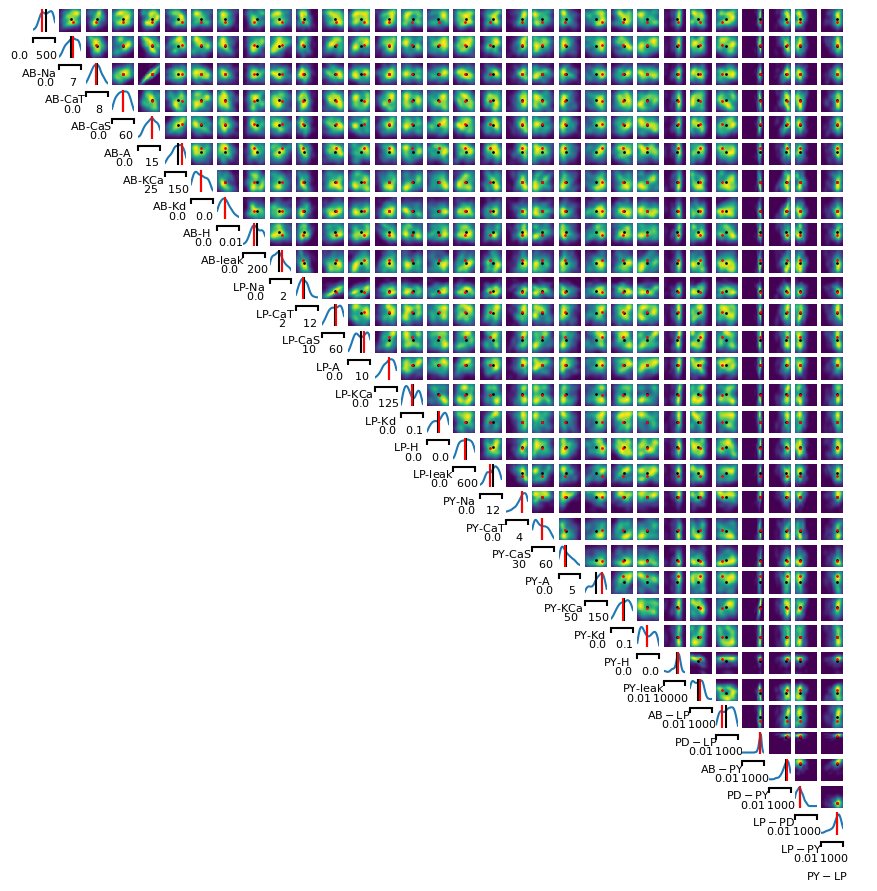

In [20]:
import matplotlib as mpl
with mpl.rc_context(fname='../../.matplotlibrc'):
    mpl.rc('font',family='DejaVu Sans')
    fig, axes = pairplot(
            samples=[samples[:100]],
            labelpad=100,
            tick_labelpad=1,
            limits=lims,
            ticks=lims,
            tick_labels=all_labels,
            fig_size=(10.45, 10.45),
            labels=labels_,
            scatter_offdiag={'rasterized':True, 'alpha':1.0},
            diag=['kde'],
            upper=['kde'],
            hist_offdiag={'bins':50},
            plot_offdiag={'linewidth': 1.6},
            points=[MEAN, MAP], points_colors=["black", "red"], points_offdiag={"markersize":2}
        )
    fig.savefig("full_posterior_refiend94.pdf", bbox_inches="tight")

In [21]:
limits = list(zip(list(task.get_prior_dist().support.base_constraint.lower_bound), list(task.get_prior_dist().support.base_constraint.upper_bound)))
cond_idx = 40

In [22]:
# with mpl.rc_context(fname='../../.matplotlibrc'):
#     mpl.rc('font',family='DejaVu Sans')
#     fig = conditional_pairplot(posterior, samples[cond_idx], limits, labels=task.names, figsize=(40,40), diag="kde", points=[samples[cond_idx]], points_colors=["darkgreen"], points_offdiag={"markersize":10})
#     fig[0].savefig("full_conditonal_pairplot_refined94.pdf")


In [23]:
import torch
import matplotlib as mpl
predictives = xs_predictives
post_pred_valid = predictives[(predictives!=-99).all(1)]

In [24]:

names = ["AB/PD CaS       $\\;\\;$", "AB/PD Ca       $\\;\\;$", "Syn.AB-LP       $\\;\\;$", "Syn.PD-LP       $\\;\\;$"]

In [25]:
thetas, xs = task.get_precomputed_dataset()
xs = xs[:1000000]
prior_pred_valid = xs[(xs!=-99).all(1)]

xs_mean = prior_pred_valid.mean(0)
xs_std = prior_pred_valid.std(0)
# z score the x
prior_pred_valid_zscored = (prior_pred_valid - xs_mean)/xs_std
post_pred_valid_zscored = (post_pred_valid - xs_mean)/xs_std
x_o_zscored = (task.get_observation(2)-xs_mean)/xs_std

median_dist_prior = torch.sqrt(torch.sum((prior_pred_valid_zscored - x_o_zscored)**2, 1).median())
median_dist_posterior = torch.sqrt(torch.sum((post_pred_valid_zscored - x_o_zscored)**2, 1).median())

/mnt/qb/work/macke/mgloeckler90/SNVI_paper/snlvibm/sbivibm/sbivibm/tasks/pyloric_stg/pyloric_stg.py:204: UserWarning: masked_fill_ received a mask with dtype torch.uint8, this behavior is now deprecated,please use a mask with dtype torch.bool instead. (Triggered internally at  ../aten/src/ATen/native/TensorAdvancedIndexing.cpp:1582.)
  xs[np.isnan(xs)] = self.nan_replace


In [26]:
fontsize=9

In [27]:
import matplotlib as mpl
import seaborn as sns
idx = [2,4, 24, 25]
small_samples = samples[:, idx]
sns.set(font="DejaVu Sans")
with mpl.rc_context(fname='../../.matplotlibrc'):
    mpl.rc('font',family='DejaVu Sans')
    m = MEAN[idx]
    mode = MAP[idx]
    fig1, axes = pairplot(small_samples, figsize=(2.2,2.2), labels=names,diag="kde", points_offdiag={"markersize":4}, cmap="viridis", points=[m,mode], points_colors=["black", "C3"])
#     ]
    for i in range(2):
        axes[i,i].set_xticks((np.round(limits[idx[i]][0],2), np.round(limits[idx[i]][1],2)))
    for i in range(2,4):
        axes[i,i].set_xticks((np.round(limits[idx[i]][0],2), np.round(limits[idx[i]][1],2)))
        axes[i,i].set_xticklabels((r"$10^{-2}$", r"$10^{3}$"))
        
#     #axes[1,0].scatter(m[1], m[0], color="black")
#     axes[-1,0].scatter(mode[0], mode[-1],color="red")
    fig1.savefig("small_posterior_refiend94.pdf", transparent=True)

/mnt/qb/work/macke/mgloeckler90/miniconda3/envs/snvi/lib/python3.9/site-packages/sbi/utils/plot.py:188: UserWarning: Importing `pairplot` from `sbi.utils` is deprecated since sbi v0.15.0. Instead, use `from sbi.analysis import pairplot`.
  warn(


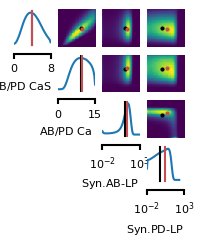

In [28]:
fig1

In [29]:
cond_idx = 40

/mnt/qb/work/macke/mgloeckler90/miniconda3/envs/snvi/lib/python3.9/site-packages/sbi/utils/plot.py:440: UserWarning: Importing `conditional_pairplot` from `sbi.utils` is deprecated since sbi v0.15.0. Instead, use `from sbi.analysis import conditional_pairplot`.
  warn(


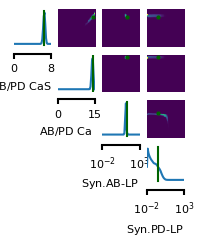

In [30]:

class SmallPost():
    def log_prob(self,y):
        N = len(y)
        x = samples[cond_idx].clone().repeat(N,1)
        x[:,idx] = y
        return posterior.log_prob(x)
p = SmallPost()  

limits_small = [limits[i] for i in idx]
with mpl.rc_context(fname='../../.matplotlibrc'):
    mpl.rc('font',family='DejaVu Sans')
    fig2, axes = conditional_pairplot(p, samples[cond_idx][idx], limits_small, labels=names, tick_labelpad=1,labelpad=1, fontsize=20, figsize=(2.2,2.2), points_offdiag={"markersize":4}, points=[samples[cond_idx][idx]], points_colors=["darkgreen"])
    for i in range(2):
        axes[i,i].set_xticks((np.round(limits[idx[i]][0],2), np.round(limits[idx[i]][1],2)))
    for i in range(2,4):
        axes[i,i].set_xticks((np.round(limits[idx[i]][0],2),np.round(limits[idx[i]][1],2)))
        axes[i,i].set_xticklabels((r"$10^{-2}$", r"$10^{3}$"))
    fig2.savefig("small_conditional_pairplot_refined94.pdf", transparent=True)
fig2

In [31]:
MCMC_time = 47340/3600
VI_time = 528/3600
valid_rate_prior = int(np.round(len(prior_pred_valid)/len(xs), 2)*100)
valid_rate_posterior = int(np.round(len(post_pred_valid)/len(predictives),2)*100)

In [32]:
valid_rate_prior

1

In [33]:
valid_rate_posterior

94

/tmp/ipykernel_21002/3395223.py:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[0].set_yticklabels([ "Post.", "Prior"], fontsize=fontsize, fontname="DejaVu Sans")


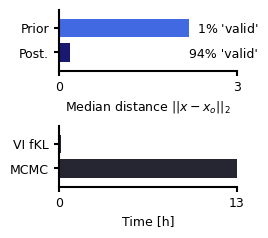

In [50]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
with mpl.rc_context(fname='../../.matplotlibrc'):
    fig, axes = plt.subplots(2,1,figsize=(2.3,2.3))
    axes[0].barh([0.15],[median_dist_posterior], color="midnightblue", height=0.15)
    axes[0].barh([0.35],[median_dist_prior], color="royalblue", height=0.15)
    #axes[0].legend(["Prior", "Posterior"], fontsize=10)
    axes[0].set_xlabel("Median distance $||x-x_o||_2$", fontsize=fontsize, fontname="DejaVu Sans")
    axes[0].set_yticklabels([ "Post.", "Prior"], fontsize=fontsize, fontname="DejaVu Sans")
    #axes[0].set_xticklabels([ 0,1,2,3], fontsize=11, fontname="DejaVu Sans")
    axes[0].set_yticks([0.15,0.35])
    axes[0].set_ylim(0,0.5)
    axes[0].set_xlim(0,3)
    axes[0].set_xticks([0,3])
    axes[0].set_xticklabels([0,3], fontsize=fontsize, fontname="DejaVu Sans")
    axes[0].text(2.2, 0.31, fr"$\ \ ${valid_rate_prior}% 'valid'", fontsize=fontsize, fontname="DejaVu Sans")
    axes[0].text(2.2, 0.11, f"{valid_rate_posterior}% 'valid'", fontsize=fontsize, fontname="DejaVu Sans")
    
    axes[1].set_xlabel("Time [h]", fontsize=fontsize, fontname="DejaVu Sans")
    axes[1].barh([0.15,0.35], [MCMC_time, VI_time], color=(0.15,0.15,0.2), height=0.15)
    axes[1].set_yticks([0.15,0.35])
    axes[1].set_ylim(0,0.5)
    axes[1].set_xlim(0,13)
    axes[1].set_xticks([0,13])
    axes[1].set_xticklabels([0,13], fontsize=fontsize, fontname="DejaVu Sans")
    axes[1].set_yticklabels(["MCMC \n (100 chains)", "VI fKL"])
    axes[1].set_yticklabels(["MCMC", "VI fKL"], fontsize=fontsize, fontname="DejaVu Sans")
    fig.subplots_adjust(hspace=0.9)
fig.savefig("predictive_fig_refined94.pdf", transparent=True, bbox_inches="tight")
fig

In [35]:
task2 = Pyloric(summary=None)
task = Pyloric()
simulator = task2.get_simulator(sim_type="sequential", seed=0)
simulator_stats = task.get_simulator(sim_type="sequential", seed=0)

In [36]:
x_pred = simulator_stats(samples[:50])

In [37]:
valid_idx = (x_pred != 0).all(1)
x_pred_valid = task2.unflatten_data(simulator(samples[:50][valid_idx]))

In [38]:
predictives_to_plot = 3

In [39]:
x_map = task2.unflatten_data(simulator(MAP))
x_mean = task2.unflatten_data(simulator(MEAN))

In [40]:
import numpy as np
npz = np.load('../../trace_data_845_082_0044.npz')
t = npz['t']
PD_spikes = npz['PD_spikes']
LP_spikes = npz['LP_spikes']
PY_spikes = npz['PY_spikes']
pdn = npz['pdn']
lpn = npz['lpn']
pyn = npz['pyn']
start_index = 219500 + 2100
end_index   = 246500 + 2100  # 32000
height_offset = 200
shown_t = t[end_index] - t[start_index]
time_len = shown_t / 0.025 * 1000
dt = t[1] - t[0]

In [41]:
t = t-t[start_index]

In [42]:
x_mean = x_mean / x_mean.max() + 1
x_map = x_map / x_map.max() + 1

In [43]:
t_sim = np.linspace(t[start_index], t[end_index], 161000-54000)

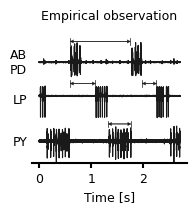

In [44]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.lines as mlines
import seaborn as sns
with mpl.rc_context(fname='../../.matplotlibrc'):
    mpl.rc('font',family='DejaVu Sans')
    fig = plt.figure(figsize=(2,1.75))
    plt.plot(t[start_index:end_index], 0.8+pdn[start_index:end_index]*0.0015, c="k", lw=0.8)
    plt.plot(t[start_index:end_index], 0.6+lpn[start_index:end_index]*0.075, c="k", lw=0.8)
    plt.plot(t[start_index:end_index], 0.33+pyn[start_index:end_index]*0.0035, c="k", lw=0.8)
    
    linew = 0.2
    headl = 0.06
    headw = 0.02
    linelen = 0.02
    circlefact = 0.2
    
    # period arrow
    height1 = 0.92
    plt.arrow(t[start_index]+0.6, height1, 1.15, 0,  shape='full', head_width=headw, head_length=headl, length_includes_head=True, color='k', lw=linew)
    plt.arrow(t[start_index]+1.75, height1, -1.15, 0,  shape='full', head_width=headw, head_length=headl, length_includes_head=True, color='k', lw=linew)
    plt.plot([t[start_index]+0.6, t[start_index]+0.6], [height1-linelen,height1+linelen], c='k', lw=linew*2.5)
    plt.plot([t[start_index]+1.75, t[start_index]+1.75], [height1-linelen,height1+linelen], c='k', lw=linew*2.5)
    #patch =mp.Ellipse((t[start_index]+1.2, 3.65), 0.2*circlefact,0.6*circlefact, color='lightgray')
    #ax.add_patch(patch)
    
    # delay arrow
    height2 = 0.67
    plt.arrow(t[start_index]+0.6, height2, 0.48, 0,  shape='full', head_width=headw, head_length=headl, length_includes_head=True, color='k', lw=linew)
    plt.arrow(t[start_index]+1.08, height2, -0.48, 0,  shape='full', head_width=headw, head_length=headl, length_includes_head=True, color='k', lw=linew)
    plt.plot([t[start_index]+0.6, t[start_index]+0.6], [height2-linelen,height2+linelen], c='k', lw=linew*2.5)
    plt.plot([t[start_index]+1.08, t[start_index]+1.08], [height2-linelen,height2+linelen], c='k', lw=linew*2.5)
    #patch =mp.Ellipse((t[start_index]+0.94, 2.1), 0.2*circlefact,0.6*circlefact, color='lightgray')
    #ax.add_patch(patch)
    
    # gap arrow
    plt.arrow(t[start_index]+1.98, height2, 0.27, 0,  shape='full', head_width=headw, head_length=headl, length_includes_head=True, color='k', lw=linew)
    plt.arrow(t[start_index]+2.25, height2, -0.27, 0,  shape='full', head_width=headw, head_length=headl, length_includes_head=True, color='k', lw=linew)
    plt.plot([t[start_index]+1.98, t[start_index]+1.98], [height2-linelen,height2+linelen], c='k', lw=linew*2.5)
    plt.plot([t[start_index]+2.25, t[start_index]+2.25], [height2-linelen,height2+linelen], c='k', lw=linew*2.5)
    #patch =mp.Ellipse((t[start_index]+2.1, 2.1), 0.2*circlefact,0.6*circlefact, color='lightgray')
    #ax.add_patch(patch)
    
    # duration arrow
    height4 = 0.43
    plt.arrow(t[start_index]+1.33, height4, 0.43, 0,  shape='full', head_width=headw, head_length=headl, length_includes_head=True, color='k', lw=linew)
    plt.arrow(t[start_index]+1.76, height4, -0.43, 0,  shape='full', head_width=headw, head_length=headl, length_includes_head=True, color='k', lw=linew)
    plt.plot([t[start_index]+1.33, t[start_index]+1.33], [height4-linelen,height4+linelen], c='k', lw=linew*2.5)
    plt.plot([t[start_index]+1.76, t[start_index]+1.76], [height4-linelen,height4+linelen], c='k', lw=linew*2.5)
    #patch =mp.Ellipse((t[start_index]+1.55, 0.9), radius=0.2, color='lightgray')
    #ax.add_patch(patch)
    
    
    #plt.xticks([0., 0.5, 1., 1.5, 2., 2.5])
    plt.yticks([0.33,0.58,0.81], labels=["PY","LP", "AB\nPD"], fontsize=fontsize)
    plt.xticks(fontsize=fontsize)
    plt.ylim(0.2,1.)
    plt.xlabel("Time [s]", fontsize=fontsize)
    plt.title("Empirical observation", fontsize=fontsize)
    sns.despine(fig, left=True)
    ax = plt.gca()
    ax.tick_params(axis="y",length=0)
    fig.savefig("traces_empirical.pdf", transparent=True, bbox_inches="tight")
fig

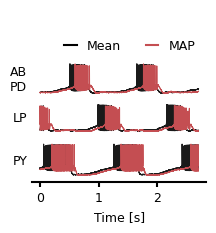

In [45]:

import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.lines as mlines
import seaborn as sns
plt.rcParams['svg.fonttype'] = 'path'
with mpl.rc_context(fname='../../.matplotlibrc'):
    mpl.rc('font',family='DejaVu Sans')
    fig = plt.figure(figsize=(2.25,2))
    plt.plot(t_sim, 0.75+x_mean[0,0][55000:162000]*0.07, c="k", lw=0.8)
    plt.plot(t_sim, 0.52+x_mean[0,1][55000:162000]*0.07, c="k", lw=0.8)
    plt.plot(t_sim, 0.28+x_mean[0,2][55000:162000]*0.07, c="k", lw=0.8)
    
    plt.plot(t_sim, 0.75+x_map[0,0][55000:162000]*0.07, c="C3", lw=0.8)
    plt.plot(t_sim, 0.52+x_map[0,1][55000:162000]*0.07, c="C3", lw=0.8)
    plt.plot(t_sim, 0.28+x_map[0,2][55000:162000]*0.07, c="C3", lw=0.8)
    
    line1 = mlines.Line2D([0,1],[0,1], color="black", label="Mean")
    line2 = mlines.Line2D([0,1],[0,1], color="C3", label="MAP")
    plt.legend(handles=[line1,line2], ncol=2, fontsize=fontsize, handlelength=1)
    plt.xticks(fontsize=10)
    plt.yticks([0.33,0.58,0.81], labels=["PY","LP", "AB\nPD"], fontsize=fontsize, fontname="DejaVu Sans")
    plt.ylim(0.2,1.1)
    plt.xticks(fontsize=fontsize)
    plt.xlabel("Time [s]", fontsize=fontsize, fontname="DejaVu Sans")
    plt.title("Posterior mean/map", color="white", fontsize=fontsize, fontname="DejaVu Sans")
    sns.despine(fig, left=True)
    ax = plt.gca()
    ax.tick_params(axis="y",length=0)
    fig.savefig("traces_map_refined94.pdf", transparent=True,bbox_inches="tight")
fig

In [46]:
# Some dont look pretty because internal spikes collapse... -> Due to summary statistics! Not inference!

In [47]:
idx = [7,8,9]

In [48]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.lines as mlines
with mpl.rc_context(fname='../../.matplotlibrc'):
    mpl.rc('font',family='DejaVu Sans')
    fig = plt.figure(figsize=(2.25,2.05))
    colors = ["seagreen", "brown", "midnightblue"]
    for i in range(predictives_to_plot):
        x = x_pred_valid[idx[i],:] 
        x = x / x.max() + 1
        plt.plot(t_sim, 0.75+x[0][55000:162000]*0.07, c=colors[i], lw=0.8, alpha=0.8)
        plt.plot(t_sim, 0.52+x[1][55000:162000]*0.07, c=colors[i], lw=0.8, alpha=0.8)
        plt.plot(t_sim, 0.28+x[2][55000:162000]*0.07, c=colors[i], lw=0.8, alpha=0.8)
    plt.xticks(fontsize=10)
    plt.yticks([0.33,0.58,0.81], labels=["PY","LP", "AB\nPD"], fontsize=fontsize)
    plt.ylim(0.2,1.1)
    plt.xticks(fontsize=fontsize)
    plt.xlabel("Time [s]", fontsize=fontsize)
    plt.title("Random samples", fontsize=fontsize, y=0.8)
    plt.yticks([])
    sns.despine(fig, left=True)
    ax = plt.gca()
    ax.tick_params(axis="y",length=0)
    fig.savefig("traces_samples_refined94.pdf", transparent=True, bbox_inches="tight")
    

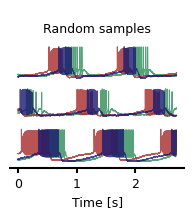

In [49]:
fig